<a href="https://colab.research.google.com/github/poursa/NNZHExercises/blob/main/makemore_part1_bigrams_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import torch
import random

words = open('names.txt', 'r').read().splitlines()

random.shuffle(words)
train_words = words[:int((len(words)+1)*.80)] #80%  training set
test_words = words[int((len(words)+1)*.80):int((len(words)+1)*.90)] #10% test set
dev_words = words[int((len(words)+1)*.90):] #10% dev set

print(len(words))
print(len(train_words))
print(len(test_words))
print(len(dev_words))


chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

32033
25627
3203
3203


#Trigram model

In [114]:
N = torch.zeros((27*27, 27), dtype=torch.int32)

In [115]:
for w in words:
  chs = ['.','.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1*27 + ix2, ix3] += 1

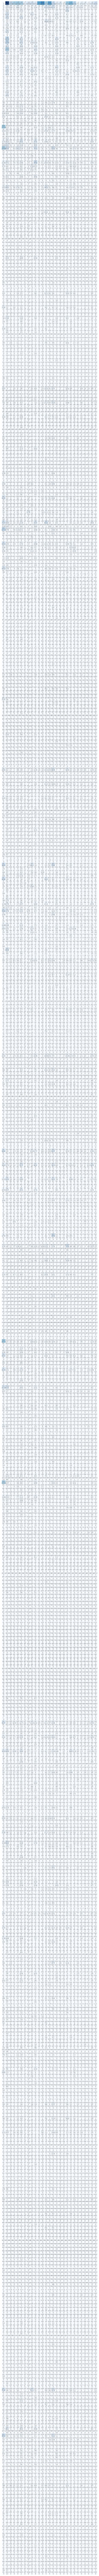

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

initial = 0

plt.figure(figsize=(256,256))
plt.imshow(N, cmap='Blues')
for i in range(27*27):
      for k in range(27):
          chstr = itos[i//27] + itos[i%27] + itos[k]
          plt.text(k, i, chstr, ha="center", va="bottom", color='gray')
          plt.text(k, i, N[i, k].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [116]:
P = (N+0.000001).float()
P /= P.sum(1, keepdims=True)
P.shape

torch.Size([729, 27])

In [118]:
g = torch.Generator().manual_seed(27579486647)

for i in range(10):
  
  out = []
  firstx = 0
  secondx = 0
  while True:
    p = P[firstx*27 + secondx]
    firstx = secondx
    secondx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[secondx])
    if secondx == 0:
      break
  print(''.join(out))

deenzin.
beah.
merikyrab.
sa.
dayion.
wapruccarisomilo.
thanfiya.
sah.
brexantas.
an.


In [129]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.', '.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    prob = P[ix1*27 + ix2, ix3]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

trigramloss = nll/n

log_likelihood=tensor(-498602.2188)
nll=tensor(498602.2188)
2.185452461242676


# Layer trigram model full set


In [238]:

# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.','.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append(ix1*27 + ix2)
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [28]:
#xenc = F.one_hot(xs, num_classes=27*27).float()
#xenc.shape

In [ ]:
#W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
trigramloss = 2.185452461242676

In [147]:


losscheck = 0
# gradient descent
while abs(trigramloss - losscheck) > 0.005:
  
  # forward pass

  #xenc = F.one_hot(xs, num_classes=27*27).float()
  #print(xs)
  #xenc = torch.cat((xenc, xenc),2)[: , 0:1 , :].squeeze(axis=1)# input to the network: one-hot encoding
  logits = W[xs] # predict log-counts
  #print(logits)
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  oldloss = loss
  loss = -probs[torch.arange(num), ys].log().mean() #+ 0.01*(W**2).mean()
  losscheck = loss.item()
  #print(loss.item(), end="")
  if oldloss < loss:
    print(loss ," <- bigger")
  #print()
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -100 * W.grad
print(losscheck)
  

2.188323736190796


In [148]:
## sample from the 'neural' model
g = torch.Generator().manual_seed(27579486647)

for i in range(10):
  
  out = []
  firstx = 0
  secondx = 0
  while True:
    
    
    #xenc = F.one_hot(torch.tensor([ix]), num_classes=27*27).float()
    #print(xenc)
    logits = W[firstx*27 + secondx] # predict log-counts
    firstx = secondx
    #print(logits)


    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(0, keepdims=True) # probabilities for next character
    # ----------
    
    secondx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[secondx])
    if secondx == 0:
      break
  print(''.join(out))

deenzin.
beah.
merikyrab.
sa.
dayion.
wapruccarisomilo.
thanfiya.
sah.
brexantas.
an.


#Models with train/test/dev sets


##Bigram

In [149]:
bigramloss = 2.476470470428467

In [234]:
# create the dataset
xs, ys = [], []
for w in train_words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
numtr = xs.nelement()
print('number of train examples: ', numtr)

xtst, ytst = [], []
for w in test_words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xtst.append(ix1)
    ytst.append(ix2)
xtst = torch.tensor(xtst)
ytst = torch.tensor(ytst)
numtst = xtst.nelement()
print('number of test examples: ', numtst)

xdev, ydev = [], []
for w in dev_words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xdev.append(ix1)
    ydev.append(ix2)
xdev = torch.tensor(xdev)
ydev = torch.tensor(ydev)
numdev = xdev.nelement()
print('number of dev examples: ', numdev)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of train examples:  182481
number of test examples:  22831
number of dev examples:  22834


In [236]:

smweights = [ 10, 5, 2, 1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001, 0]
trainloss, testloss, devloss = [], [], []
for smweight in smweights: 
  loss = 0
  g = torch.Generator().manual_seed(2147483647)
  W = torch.randn((27, 27), generator=g, requires_grad=True)
  # gradient descent
  for k in range(200):
    
    # forward pass
    logits = W[xs] # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(numtr), ys].log().mean() + smweight*(W**2).mean()
    #print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update
    W.data += -50 * W.grad
  trainloss.append((loss).item())

  #testset eval
  logits = W[xtst] # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  prob = counts / counts.sum(1, keepdims=True) #probabilities
  loss = -probs[torch.arange(numtst), ytst].log().mean()
  testloss.append((loss).item())

  #devset eval
  logits = W[xdev] # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  prob = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(numdev), ydev].log().mean()
  devloss.append((loss).item())

print(smweights)
print(trainloss)
print(testloss)
print(devloss)



[10, 5, 2, 1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 1e-05, 0]
[3.2078733444213867, 3.140296697616577, 3.008776903152466, 2.8913822174072266, 2.8535804748535156, 2.7776358127593994, 2.585808038711548, 2.537998676300049, 2.482348680496216, 2.4726552963256836, 2.4640138149261475, 2.4619381427764893, 2.4617276191711426, 2.4617042541503906]
[3.219578742980957, 3.1764256954193115, 3.124447822570801, 3.107390880584717, 3.107325315475464, 3.11527156829834, 3.1966586112976074, 3.241863489151001, 3.323547601699829, 3.3409512042999268, 3.3568708896636963, 3.3607301712036133, 3.361121416091919, 3.3611650466918945]
[3.2186999320983887, 3.174863338470459, 3.121373176574707, 3.102809190750122, 3.1022379398345947, 3.109145164489746, 3.1876461505889893, 3.2319655418395996, 3.3126022815704346, 3.3298425674438477, 3.3456249237060547, 3.349452257156372, 3.3498404026031494, 3.349883556365967]


##Trigram

In [239]:
import torch.nn.functional as F


# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.','.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append(ix1*27 + ix2)
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

xtst, ytst = [], []
for w in test_words:
  chs = ['.','.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xtst.append(ix1*27 + ix2)
    ytst.append(ix3)
xtst = torch.tensor(xtst)
ytst = torch.tensor(ytst)
numtst = xtst.nelement()
print('number of test examples: ', numtst)

xdev, ydev = [], []
for w in dev_words:
  chs = ['.','.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xdev.append(ix1*27 + ix2)
    ydev.append(ix3)
xdev = torch.tensor(xdev)
ydev = torch.tensor(ydev)
numdev = xdev.nelement()
print('number of dev examples: ', numdev)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27, 27), generator=g, requires_grad=True)

number of examples:  228146
number of test examples:  22831
number of dev examples:  22834


In [241]:
smweights = [ 10, 5, 2, 1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001, 0]
trainloss, testloss, devloss = [], [], []
for smweight in smweights: 
  loss = 0
  g = torch.Generator().manual_seed(2147483647)
  W = torch.randn((27*27, 27), generator=g, requires_grad=True)
  # gradient descent
  for k in range(10):
    
    # forward pass
    logits = W[xs] # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + smweight*(W**2).mean()
    #print(loss.item())
    
    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update
    W.data += -50 * W.grad
  trainloss.append((loss).item())
  
  #testset eval
  loss = 0
  logits = W[xtst] # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  prob = counts / counts.sum(1, keepdims=True) #probabilities
  loss = -probs[torch.arange(numtst), ytst].log().mean()
  testloss.append((loss).item())

  #devset eval
  loss = 0
  logits = W[xdev] # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  prob = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(numdev), ydev].log().mean()
  devloss.append((loss).item())

print(smweights)
print(trainloss)
print(testloss)
print(devloss)

[10, 5, 2, 1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 1e-05, 0]
[6.945995330810547, 6.229948043823242, 4.815352439880371, 4.095015048980713, 3.932969570159912, 3.677894353866577, 3.3144757747650146, 3.267111301422119, 3.2289047241210938, 3.2241086959838867, 3.220269203186035, 3.219404697418213, 3.21931791305542, 3.219308376312256]
[3.346365451812744, 3.416799306869507, 3.4765737056732178, 3.5001063346862793, 3.505052089691162, 3.5126230716705322, 3.523010015487671, 3.524333953857422, 3.525393009185791, 3.5255258083343506, 3.525634288787842, 3.525658369064331, 3.525660276412964, 3.525660753250122]
[3.3536157608032227, 3.4259660243988037, 3.4870963096618652, 3.5111196041107178, 3.5161654949188232, 3.5238888263702393, 3.534482002258301, 3.5358316898345947, 3.536912202835083, 3.5370469093322754, 3.5371580123901367, 3.537182092666626, 3.537184715270996, 3.5371851921081543]
